<a href="https://colab.research.google.com/github/chouinaf/Docker-for-Developers/blob/master/Lecture_Multiple_et_Animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [2]:
# Change directory to '/path/to/your/directory'
#os.chdir('/path/to/your/directory')
# Optionnel . Mount de l'espace Google Drive
from google.colab import drive
drive.mount('/content/drive')

# If necessary, change directory to '/path/to/your/directory'
os.chdir('/content/drive/MyDrive/Dev/Teluq/INF 1430/Projet')
#get current directory for file
current_dir = os.getcwd()
print(current_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Dev/Teluq/INF 1430/Projet


In [3]:
# Load the compressed NPZ file
data = np.load('data_allv2.npz', allow_pickle=True)

# Access the arrays
image_array = data['image']
label_array = data['label']
seq_index_dict = data['index'].item()

In [4]:
print(image_array.shape)


(15345, 616, 756)


In [12]:
#image_array.shape
label_array.shape

(15345,)

In [28]:
seq_index_dict = data['index'].item()
print(type(seq_index_dict))
keys_list = list(seq_index_dict.keys())
print(keys_list)
for key in keys_list:
  #print(str(label_array[seq_index_dict[key]-1]))
  print(key + ": " + str(seq_index_dict[key]))


<class 'dict'>
['Vincent-acq0.igs.mha', 'Vincent-acq1.igs.mha', 'Vincent-acq2.igs.mha', 'Vincent-acq3.igs.mha', 'Vincent-acq4.igs.mha', 'John-acq0.igs.mha', 'John-acq1.igs.mha', 'John-acq2.igs.mha', 'John-acq3.igs.mha', 'John-acq4.igs.mha', 'Thomas-acq0.igs.mha', 'Thomas-acq1.igs.mha', 'Thomas-acq2.igs.mha', 'Thomas-acq3.igs.mha', 'Thomas-acq4.igs.mha', 'Alex-acq1.igs.mha', 'Alex-acq3.igs.mha', 'Alex-acq4.igs.mha', 'Alex-acq5.igs.mha', 'Wild Card-acq0.igs.mha', 'Wild Card-acq1.igs.mha', 'Wild Card-acq2.igs.mha', 'Wild Card-acq3.igs.mha', 'Wild Card-acq5.igs.mha']
Vincent-acq0.igs.mha: 0
Vincent-acq1.igs.mha: 611
Vincent-acq2.igs.mha: 1072
Vincent-acq3.igs.mha: 1549
Vincent-acq4.igs.mha: 1960
John-acq0.igs.mha: 2447
John-acq1.igs.mha: 3407
John-acq2.igs.mha: 4268
John-acq3.igs.mha: 5004
John-acq4.igs.mha: 5599
Thomas-acq0.igs.mha: 6360
Thomas-acq1.igs.mha: 6724
Thomas-acq2.igs.mha: 7262
Thomas-acq3.igs.mha: 7678
Thomas-acq4.igs.mha: 8231
Alex-acq1.igs.mha: 8838
Alex-acq3.igs.mha: 9492
A

In [ ]:
printlabel_array[2447]

Histogram shows that there are more bone images that gap or tailbone

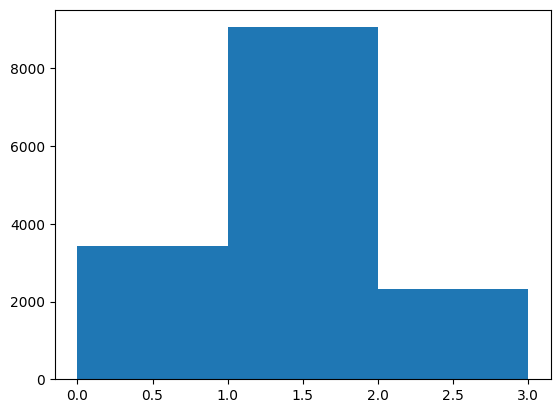

In [7]:
# class 0 : Gap
# class 1 : Bone
# class 2 : Tailbone

np.histogram(label_array, bins=3, range = (0,3))
plt.hist(label_array, bins=3, range = (0,3))
plt.show()

# Display vertabrae image in a 3 x 3 grid

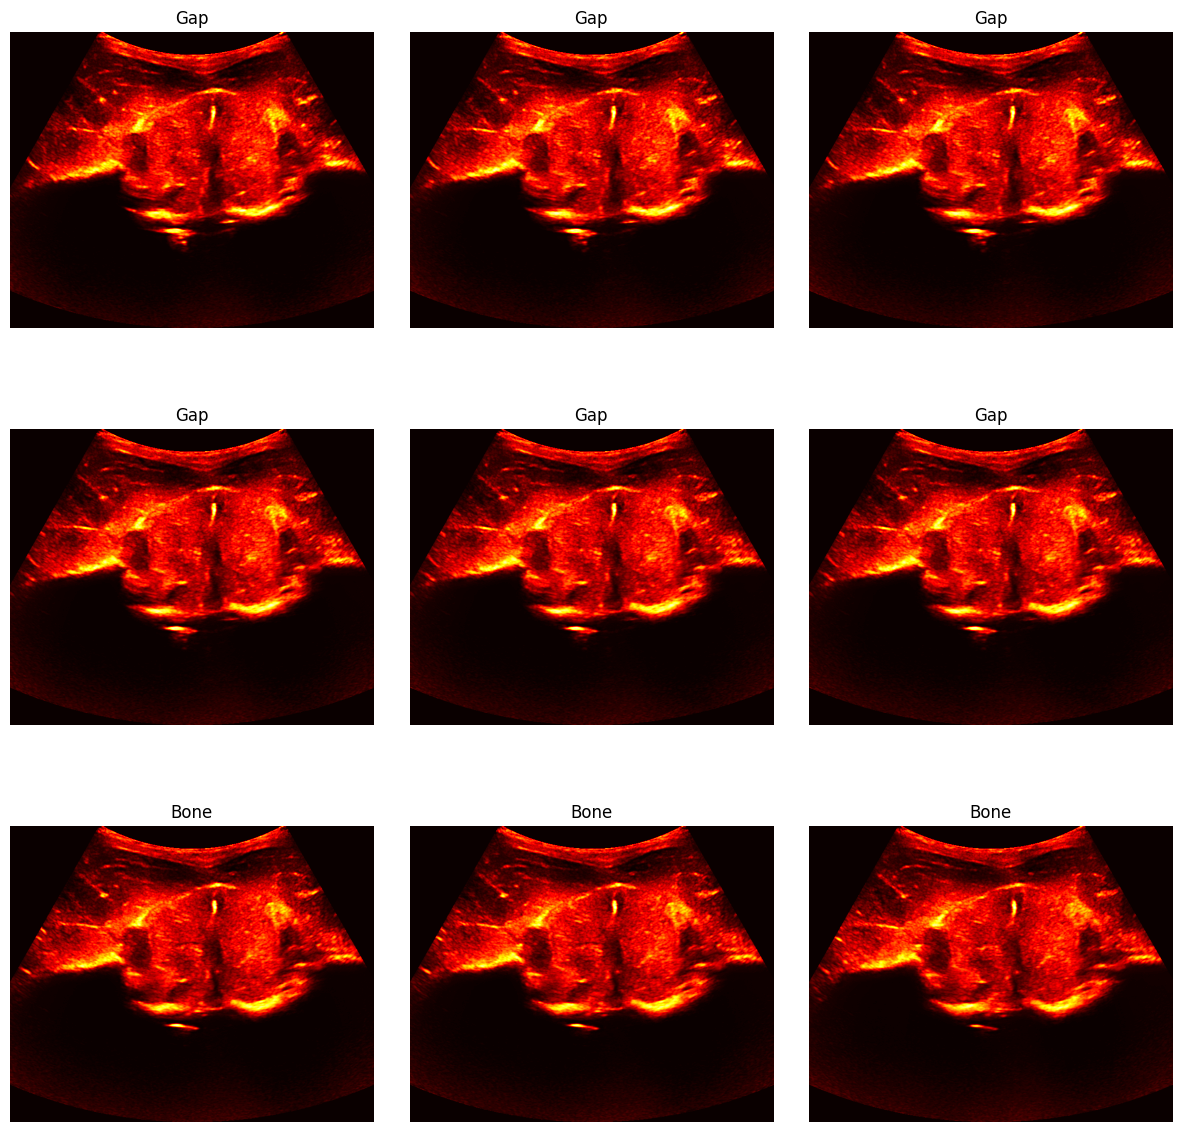

In [ ]:
import matplotlib.pyplot as plt

# Assuming your image array is named image_array and label array is named label_array
# image_array = ...  # shape: (15345, 616, 756)
# label_array = ...  # shape: (15345,

class_names = ['Gap','Bone', 'Tailbone']

# Create a figure and axis objects
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Adjust spacing
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Extract and display the next set of 9 images along with their corresponding labels
start_index = 90  # Index to start extracting images from
for i in range(3):
    for j in range(3):
        index = start_index + i * 3 + j
        img = image_array[index][::-1]
        label = label_array[index].astype(np.uint8)

        axs[i, j].imshow(img, cmap="hot")
        axs[i, j].axis('off')
        axs[i, j].set_title(f"{class_names[label]}")  # Set the title of the subplot to display the label

plt.show()

# Display an animation of the images

In [ ]:
import matplotlib.animation as animation

# Function to update the image and label in the animation
def update(frame):
    ax.imshow(image_array[frame][::-1], cmap='hot')  # Set colormap to 'hot'
    #ax.set_title(f"{class_names[label_array[frame].astype(np.uint8)]}")
    ax.set_title("Frame: {} - Class: {}".format(frame, class_names[label_array[frame].astype(np.uint8)]))
    return ax,

# Create a figure and axis objects
fig, ax = plt.subplots()

# Set initial image and label
ax.imshow(image_array[0][::-1], cmap='hot')  # Set colormap to 'hot'
#ax.set_title(f"{class_names[label_array[0].astype(np.uint8)]}")
ax.set_title("Frame: {} - Class: {}".format(1, class_names[label_array[1].astype(np.uint8)]))

num_frames = 100

# Create animation
ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=100)
#plt.show()
from IPython.display import HTML
HTML(ani.to_html5_video())

# Create FFMpegWriter object
writer = animation.FFMpegWriter(fps=10)  # Specify frames per second (fps) for the video

# Save the animation as a video file
ani.save('animation.mp4', writer=writer)
